In [1]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np

from dateutil.relativedelta import relativedelta as rltd
import datetime as dt

from processDataYF import DataYFinance
import quantiTools as qt

%load_ext autoreload
%autoreload 2


ARQUIVO PARA TESTES DAS FUNÇÕES NOS CASOS ESCALAR E VETORIAL

In [2]:
tickers = ['ABEV3.SA', 'BBDC4.SA', 'MGLU3.SA','ITSA4.SA', "JHSF3.SA", "EZTC3.SA",
            "BEEF3.SA", "JBSS3.SA", "BBSE3.SA", "TAEE3.SA", "MULT3.SA", "PETR4.SA", "VALE3.SA",'^BVSP']

ticker = 'ABEV3.SA'


endDate = dt.date.today()
startDate = endDate - rltd(months=12)

ESCALAR

In [3]:
escalar = DataYFinance(ticker)

escalarAdjClose = escalar.getAdjclose(startDate, endDate)
escalarMReturns = escalar.mReturns(escalarAdjClose)
escalarDReturns = escalar.dReturns(escalarAdjClose)
escalarMVol = escalar.mVol(escalarAdjClose)
escalarDVol = escalar.dVol(escalarAdjClose)
escalarAVol = escalar.aVol(escalarAdjClose)


[*********************100%***********************]  1 of 1 completed


In [4]:
type(escalarDReturns)

pandas.core.series.Series

In [5]:
volatilidade_movel = qt.rolVol(escalarDReturns, 15)
volatilidade_fixa = escalar.aVol(escalarAdjClose)

0.2686771852480395

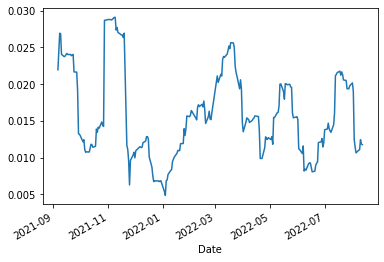

In [6]:
volatilidade_movel.plot()
volatilidade_fixa

In [7]:
# PARA DESVIO PADRÃO AMOSTRAL
escalarAdjClose.std()

# PARA DESVIO PADRÃO DA POPULAÇÃO
np.std(escalarAdjClose)


print(escalarAdjClose.std(), np.std(escalarAdjClose))

0.9298709457399045 0.9280018565219615


In [46]:
qt.ewmadVol(escalarDReturns, 24)*np.sqrt(252)

Adj Close    0.204694
dtype: float64

VETORIAL

In [8]:
vetorial = DataYFinance(tickers)

vetorialAdjClose = vetorial.getAdjclose(startDate, endDate)
vetorialMReturns = vetorial.mReturns(vetorialAdjClose)
vetorialDReturns = vetorial.dReturns(vetorialAdjClose)
vetorialMVol = vetorial.mVol(vetorialAdjClose)
vetorialDVol = vetorial.dVol(vetorialAdjClose)
vetorialAVol = vetorial.aVol(vetorialAdjClose)

[*********************100%***********************]  14 of 14 completed


In [9]:
vetorialDReturns

,ABEV3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,EZTC3.SA,ITSA4.SA,JBSS3.SA,JHSF3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,TAEE3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,
2021-08-17,-0.004878,-0.003906,-0.013440,-0.024420,-0.022100,-0.013193,-0.021137,-0.049563,-0.005664,-0.022635,-0.000003,0.006798,-0.016544,-0.010706
2021-08-18,0.009191,-0.006536,-0.007063,0.011264,0.007667,0.002674,0.007324,0.024540,-0.024340,-0.012506,-0.008879,-0.010503,-0.033551,-0.010695
2021-08-19,0.043716,-0.002193,0.003557,0.037129,0.008811,-0.008000,0.038004,0.016467,0.005839,0.008912,-0.005599,0.003791,-0.057055,0.004475
2021-08-20,0.020361,-0.005715,0.005570,-0.007160,0.024613,0.001792,0.009551,0.013255,-0.004749,0.008833,-0.001502,0.019637,0.000410,0.007579
2021-08-23,-0.010262,0.007073,-0.018127,0.021635,-0.024797,0.004472,0.034374,-0.024709,-0.038706,-0.020276,0.015790,-0.010370,-0.013839,-0.004922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.013699,0.003243,0.035463,0.039080,0.017042,0.013319,-0.036358,0.020339,0.034810,0.014516,0.050473,0.000707,0.008529,0.018127
2022-08-09,-0.004054,0.014547,0.010173,-0.059735,-0.050811,0.018620,-0.018698,-0.019934,-0.058104,-0.001590,0.016380,0.016254,0.020706,0.002297
2022-08-10,0.028494,0.015932,-0.011413,0.006275,0.080866,0.005376,0.039469,0.079661,0.068182,0.035032,-0.003223,0.002086,0.000714,0.014588


In [13]:
vetorialDReturns.corr()  #matriz correlação

,ABEV3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,EZTC3.SA,ITSA4.SA,JBSS3.SA,JHSF3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,TAEE3.SA,VALE3.SA,^BVSP
ABEV3.SA,1.000000,0.282514,0.307489,0.225620,0.379586,0.412162,0.293121,0.364740,0.270445,0.452207,0.159927,0.150346,-0.091347,0.422350
BBDC4.SA,0.282514,1.000000,0.320307,0.039846,0.349161,0.793676,0.108091,0.412527,0.216850,0.351503,0.410678,0.231941,0.194158,0.631080
BBSE3.SA,0.307489,0.320307,1.000000,0.237282,0.301957,0.378050,0.229302,0.324372,0.232510,0.361048,0.187519,0.309097,0.072472,0.444628
BEEF3.SA,0.225620,0.039846,0.237282,1.000000,0.157007,0.138456,0.438840,0.180449,0.117636,0.189238,0.042151,0.115514,0.065073,0.240020
EZTC3.SA,0.379586,0.349161,0.301957,0.157007,1.000000,0.421730,0.083039,0.709288,0.578567,0.687074,0.227787,0.295677,0.018130,0.631809
ITSA4.SA,0.412162,0.793676,0.378050,0.138456,0.421730,1.000000,0.167308,0.471957,0.291402,0.473738,0.444350,0.285429,0.234772,0.730360
JBSS3.SA,0.293121,0.108091,0.229302,0.438840,0.083039,0.167308,1.000000,0.163874,0.071690,0.144948,-0.047059,0.072869,0.037852,0.189926
JHSF3.SA,0.364740,0.412527,0.324372,0.180449,0.709288,0.471957,0.163874,1.000000,0.477873,0.675288,0.277205,0.276315,0.002196,0.618167
MGLU3.SA,0.270445,0.216850,0.232510,0.117636,0.578567,0.291402,0.071690,0.477873,1.000000,0.511993,0.152838,0.119147,0.107405,0.561992
MULT3.SA,0.452207,0.351503,0.361048,0.189238,0.687074,0.473738,0.144948,0.675288,0.511993,1.000000,0.270104,0.274020,0.070546,0.652966


In [10]:
(vetorialDReturns +1).prod()-1   #PARA O RETORNO ACUMULADO NO PERÍODO  

ABEV3.SA   -0.036366
BBDC4.SA   -0.034295
BBSE3.SA    0.582572
BEEF3.SA    0.824852
EZTC3.SA   -0.230728
ITSA4.SA   -0.080371
JBSS3.SA    0.074904
JHSF3.SA    0.029252
MGLU3.SA   -0.815654
MULT3.SA    0.213393
PETR4.SA    0.973045
TAEE3.SA    0.178235
VALE3.SA   -0.226471
^BVSP      -0.053835
dtype: float64

In [50]:
qt.ewmadVol(vetorialDReturns, 24)*np.sqrt(252)

ABEV3.SA    0.204694
BBDC4.SA    0.191647
BBSE3.SA    0.250518
BEEF3.SA    0.464643
EZTC3.SA    0.570981
ITSA4.SA    0.174406
JBSS3.SA    0.310010
JHSF3.SA    0.485855
MGLU3.SA    1.096206
MULT3.SA    0.287744
PETR4.SA    0.437573
TAEE3.SA    0.142217
VALE3.SA    0.290609
^BVSP       0.181268
dtype: float64

In [51]:
vetorialAVol

ABEV3.SA    0.268677
BBDC4.SA    0.302690
BBSE3.SA    0.251570
BEEF3.SA    0.397546
EZTC3.SA    0.513305
ITSA4.SA    0.236423
JBSS3.SA    0.300899
JHSF3.SA    0.454663
MGLU3.SA    0.795289
MULT3.SA    0.363918
PETR4.SA    0.369157
TAEE3.SA    0.182772
VALE3.SA    0.379708
^BVSP       0.204791
dtype: float64

In [40]:
operaMatriz = vetorialDReturns
operaMatriz

,ABEV3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,EZTC3.SA,ITSA4.SA,JBSS3.SA,JHSF3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,TAEE3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,
2021-08-17,-0.004878,-0.003906,-0.013440,-0.024420,-0.022100,-0.013193,-0.021137,-0.049563,-0.005664,-0.022635,-0.000003,0.006798,-0.016544,-0.010706
2021-08-18,0.009191,-0.006536,-0.007063,0.011264,0.007667,0.002674,0.007324,0.024540,-0.024340,-0.012506,-0.008879,-0.010503,-0.033551,-0.010695
2021-08-19,0.043716,-0.002193,0.003557,0.037129,0.008811,-0.008000,0.038004,0.016467,0.005839,0.008912,-0.005599,0.003791,-0.057055,0.004475
2021-08-20,0.020361,-0.005715,0.005570,-0.007160,0.024613,0.001792,0.009551,0.013255,-0.004749,0.008833,-0.001502,0.019637,0.000410,0.007579
2021-08-23,-0.010262,0.007073,-0.018127,0.021635,-0.024797,0.004472,0.034374,-0.024709,-0.038706,-0.020276,0.015790,-0.010370,-0.013839,-0.004922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.013699,0.003243,0.035463,0.039080,0.017042,0.013319,-0.036358,0.020339,0.034810,0.014516,0.050473,0.000707,0.008529,0.018127
2022-08-09,-0.004054,0.014547,0.010173,-0.059735,-0.050811,0.018620,-0.018698,-0.019934,-0.058104,-0.001590,0.016380,0.016254,0.020706,0.002297
2022-08-10,0.028494,0.015932,-0.011413,0.006275,0.080866,0.005376,0.039469,0.079661,0.068182,0.035032,-0.003223,0.002086,0.000714,0.014588


In [41]:
lam = 0.94
janela = 24
operaMatriz = operaMatriz[len(operaMatriz)- janela:]
#operaMatriz['Janela'] = 0
operaMatriz['Expo'] = np.arange(janela-1,-1,-1)
#mudou['EWMA Vol'] = mudou.apply(lambda x: (x['Returns']**2)* (1 - lam) * (lam) **(x['Expo']) , axis=1)


operaMatriz = operaMatriz.apply(lambda x: (x**2)* (1 - lam) * (lam) **(x['Expo']) , axis=1)
operaMatriz.drop('Expo', axis=1, inplace=True)


operaMatriz
#np.sqrt(operaMatriz.sum())




#lambda <args> : <return Value> if <condition > ( <return value > if <condition> else <return value>)



C:\Users\gabri\AppData\Local\Temp\ipykernel_6444\333983741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operaMatriz['Expo'] = np.arange(janela-1,-1,-1)


,ABEV3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,EZTC3.SA,ITSA4.SA,JBSS3.SA,JHSF3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,TAEE3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,
2022-07-12,6.988407e-06,2.439753e-07,1.120866e-07,4.512935e-06,2.231561e-05,8.559100e-08,2.509482e-06,5.679218e-06,1.881147e-04,8.446107e-07,3.254456e-06,3.422040e-08,1.319227e-07,5.217552e-09
2022-07-13,4.920672e-05,7.990914e-06,1.960220e-07,1.990113e-07,1.373692e-06,1.463914e-06,1.188851e-06,4.800985e-06,1.791554e-05,1.991121e-06,7.720736e-09,8.165388e-08,1.801453e-07,2.422381e-07
2022-07-14,5.618833e-06,8.451436e-06,3.037024e-05,1.345262e-07,9.417149e-06,9.925733e-08,4.520495e-07,6.404320e-06,1.307510e-05,1.025471e-06,1.184204e-05,6.148855e-07,7.262031e-05,5.290110e-06
2022-07-15,4.939927e-06,6.519449e-07,3.079470e-05,2.821170e-05,3.065584e-05,1.658129e-05,6.253474e-06,5.860284e-06,3.473840e-05,2.582191e-06,5.088064e-06,8.178344e-07,6.650465e-07,3.483443e-07
2022-07-18,8.699077e-07,3.021430e-06,9.718406e-06,9.984871e-06,6.407406e-05,1.699756e-06,1.183534e-06,1.737362e-05,2.396018e-07,9.213924e-07,9.702162e-06,3.814399e-07,5.133806e-07,2.646383e-07
2022-07-19,9.382871e-09,2.644140e-05,5.347731e-07,4.310788e-05,2.177210e-07,7.096375e-06,4.997981e-07,2.408351e-07,1.026957e-06,0.000000e+00,8.101647e-06,2.843703e-07,9.383032e-08,3.704347e-06
2022-07-20,3.238393e-06,3.404745e-06,3.128263e-06,5.511421e-07,2.488583e-05,4.799830e-06,4.621340e-06,3.116730e-06,2.110728e-04,3.293834e-08,2.460985e-09,4.877057e-08,9.806463e-06,3.830032e-09
2022-07-21,7.370081e-06,4.061706e-06,2.338396e-06,5.803379e-07,3.517016e-05,3.115010e-06,1.578016e-05,1.116175e-05,8.515729e-06,9.991720e-07,5.895247e-07,1.301106e-06,6.835533e-06,1.284347e-06
2022-07-22,2.796982e-07,3.848871e-06,2.101661e-06,4.052190e-05,1.764803e-06,2.621851e-06,4.878203e-07,4.704913e-06,5.890052e-05,2.423981e-06,2.706439e-06,5.453092e-06,2.066120e-06,2.820699e-08


In [ ]:
print(np.sqrt(mudou['EWMA Vol'].sum()), mudou['Returns'].std())

0.014518260153738211 0.016917667855646197


In [ ]:
retCurso = [0.00905760315335913, 0.00116765858322809, -0.000445880882688043, 0.000936576685556245, -0.0133409234034462, 0.0242409580641387, -0.0000198972308028678, 0.0145384754061046,
-0.00491242177405804, 0.00795848403452326, -0.00266014517269042, -0.0011340969022422, -0.022296177324391, 0.0041328292712306, -0.00520785576845528, 0.0000738072846750981, -0.000102040568835449,
0.0154919974877092, -0.000596651890560684, -0.011511825267322, 0.00578849006521631, 0.0236988048856839, -0.000839701827014094, 0.00945332548550071, 0, 0.00169999920172215,
-0.0370557610399581, 0.0101100470640121, -0.0301323982766565, 0.00420075264731534, 0.0148972668160547, -0.014328048822395, 0.00474108510617421, 0.0067319519068576, 0.0113872585884205,
0.0102793236008132, -0.00503727741232729, -0.0109625704891221, 0.00566649435443467, 0.0166707517956155, -0.0169351690661245, 0.000282430831438418, 0.0187465359308034, -0.00205175708608785,
0.0154216696104752, 0.00647090317477539, 0.00766338237563868, 0.0091533192012041, -0.0104831766970178, 0, 0.00158516990225643, 0.010612812012321, 0.0150385592875961,
0.0173232438184761,-0.00433663242462123, 0.00523166378529383, 0.00423306862621464, -0.000751699317777188, -0.00302357684348198, -0.000634294822613457, 0.0066401162290608, 0.00090475412260016,
0.00959279637579558, -0.0246147372364093, 0, -0.0248908749302423, -0.00245796894162398, 0.0398266902755089, 0.00165538280434618, -0.0140187425729859, -0.0325223879818402,
-0.0329643521931682, 0.00800814280869777, 0, 0.0184697772918927, -0.0162748694356685, 0.00320040983448844, 0.0184869490155057, 0.0144784033212888, 0.00050746943683011, -0.00952442256635422,
0.00266387471530916, 0.0210597689244219, -0.029734549880281, 0.0150826772867185, -0.0387653223352172, 0.0136050592086181, -0.00803101923150562, 0.0210008970156805, 0.00533899727034259,
-0.0120139576385995, -0.00289980135660273, -0.0218510157416568, 0.00172275054741045, -0.0180236121211385, 0.00316154092996435, -0.000121925825259828, -0.0218883543897964, 0.00826268144490561,
0.00110501574339184, -0.00678792058913524]

dataCurso = ['2016-08-04', '2016-08-05', '2016-08-08', '2016-08-09', '2016-08-10', '2016-08-11', '2016-08-12', '2016-08-15', '2016-08-16', '2016-08-17', '2016-08-18',
'2016-08-19', '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02', '2016-09-05', '2016-09-06',
'2016-09-07', '2016-09-08', '2016-09-09', '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23',
'2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
'2016-10-13', '2016-10-14', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-24', '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-31',
'2016-11-01', '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11', '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17',
'2016-11-18', '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25', '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01', '2016-12-02', '2016-12-05', '2016-12-06',
'2016-12-07', '2016-12-08', '2016-12-09', '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22']

In [ ]:
retCurso = pd.Series(data=retCurso, index=dataCurso, name='Returns')
retCurso
#trataDados

2016-08-04    0.009058
2016-08-05    0.001168
2016-08-08   -0.000446
2016-08-09    0.000937
2016-08-10   -0.013341
                ...   
2016-12-16   -0.000122
2016-12-19   -0.021888
2016-12-20    0.008263
2016-12-21    0.001105
2016-12-22   -0.006788
Name: Returns, Length: 101, dtype: float64